# EECS 498-007/598-005 Assignment 1-1: PyTorch 101

Before we start, please put your name and UMID in following format

: Firstname LASTNAME, #00000000   //   e.g.) Justin JOHNSON, #12345678

**Your Answer:**   
Your NAME, #XXXXXXXX

# Setup Code
Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:

```
['pytorch101.py', 'knn.py', 'knn.ipynb', 'eecs598', 'pytorch101.ipynb']
```

In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2020FA folder and put all the files under A1 folder, then '2020FA/A1'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2020FA/A1'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'A1'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['knn.py', 'knn.ipynb', 'eecs598', '__pycache__', 'pytorch101.py', 'pytorch101.ipynb']


Once you have successfully mounted your Google Drive and located the path to this assignment, run the following cell to allow us to import from the `.py` files of this assignment. If it works correctly, it should print the message:

```
Hello from pytorch101.py!
```

as well as the last edit time for the file `pytorch101.py`.

In [ ]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "US/Eastern"
time.tzset()

from pytorch101 import hello
hello()

pytorch101_path = os.path.join(GOOGLE_DRIVE_PATH, 'pytorch101.py')
pytorch101_edit_time = time.ctime(os.path.getmtime(pytorch101_path))
print('pytorch101.py last edited on %s' % pytorch101_edit_time)

Hello from pytorch101.py!
pytorch101.py last edited on Tue Oct 22 03:57:55 2024


# Introduction

Python 3 and [PyTorch](https://pytorch.org/) will be used throughout the semseter, so it is important to be familiar with them. This material in this notebook draws from http://cs231n.github.io/python-numpy-tutorial/ and https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb. This material focuses mainly on PyTorch.

This notebook will walk you through many of the important features of PyTorch that you will need to use throughout the semester. In some cells and files you will see code blocks that look like this:

```python
##############################################################################
# TODO: Write the equation for a line
##############################################################################
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
# TODO: Instructions for what you need to do
##############################################################################
y = m * x + b
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Do not add or delete any cells from the notebook. You may add new cells to perform scatch work, but delete them before submitting.
- Run all cells before submitting. You will only get credit for code that has been run.

This notebook contains many inline sanity checks for the code you write. However, **passing these sanity checks does not mean your code is correct!** During grading we may run your code on additional inputs, and we may look at your code to make sure you've followed the specific guildelines for each implementation. You are encouraged to write additional test cases for the functions you are asked to write instead of solely relying on the sanity checks in the notebook.

# Python 3


If you're unfamiliar with Python 3, here are some of the most common changes from Python 2 to look out for.


### Print is a function

In [ ]:
print("Hello!")

Without parentheses, printing will not work.

### Floating point division by default

In [ ]:
5 / 2

To do integer division, we use two backslashes:

In [ ]:
5 // 2

### No xrange

The xrange from Python 2 is now merged into "range" for Python 3 and there is no xrange in Python 3. In Python 3, range(3) does not create a list of 3 elements as it would in Python 2, rather just creates a more memory efficient iterator.

Hence,  
xrange in Python 3: Does not exist  
range in Python 3: Has very similar behavior to Python 2's xrange

In [ ]:
for i in range(3):
    print(i)

In [ ]:
range(3)

In [ ]:
# If need be, can use the following to get a similar behavior to Python 2's range:
print(list(range(3)))

# PyTorch

[PyTorch](https://pytorch.org/) is an open source machine learning framework. At its core, PyTorch provides a few key features:

- A multidimensional **Tensor** object, similar to [numpy](https://numpy.org/) but with GPU accelleration.
- An optimized **autograd** engine for automatically computing derivatives
- A clean, modular API for building and deploying **deep learning models**

We will use PyTorch for all programming assignments throughout the semester. This notebook will focus on the **Tensor API**, as it is the main part of PyTorch that we will use for the first few assignments.

You can find more information about PyTorch by following one of the [oficial tutorials](https://pytorch.org/tutorials/) or by [reading the documentation](https://pytorch.org/docs/stable/).

To use PyTorch, we first need to import the `torch` package.

We also check the version; the assignments in this course will use PyTorch verion 1.6.0, since this is the default version in Google Colab.

In [ ]:
import torch
print(torch.__version__)

2.4.1+cu121


## Tensor Basics

### Creating and Accessing tensors

A `torch` **tensor** is a multidimensional grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the **rank** of the tensor; the **shape** of a tensor is a tuple of integers giving the size of the array along each dimension.

We can initialize `torch` tensor from nested Python lists. We can access or mutate elements of a PyTorch tensor using square brackets.

Accessing an element from a PyTorch tensor returns a PyTorch scalar; we can convert this to a Python scalar using the `.item()` method:

In [ ]:
# Create a rank 1 tensor from a Python list
a = torch.tensor([1, 2, 3])
print('Here is a:')
print(a)
print('type(a): ', type(a))
print('rank of a: ', a.dim())
print('a.shape: ', a.shape)

# Access elements using square brackets
print()
print('a[0]: ', a[0])
print('type(a[0]): ', type(a[0]))
print('type(a[0].item()): ', type(a[0].item()))

# Mutate elements using square brackets
a[1] = 10
print()
print('a after mutating:')
print(a)

Here is a:
tensor([1, 2, 3])
type(a):  <class 'torch.Tensor'>
rank of a:  1
a.shape:  torch.Size([3])

a[0]:  tensor(1)
type(a[0]):  <class 'torch.Tensor'>
type(a[0].item()):  <class 'int'>

a after mutating:
tensor([ 1, 10,  3])


The example above shows a one-dimensional tensor; we can similarly create tensors with two or more dimensions:

In [ ]:
# Create a two-dimensional tensor
b = torch.tensor([[1, 2, 3], [4, 5, 5]])
print('Here is b:')
print(b)
print('rank of b:', b.dim())
print('b.shape: ', b.shape)

# Access elements from a multidimensional tensor
print()
print('b[0, 1]:', b[0, 1])
print('b[1, 2]:', b[1, 2])

# Mutate elements of a multidimensional tensor
b[1, 1] = 100
print()
print('b after mutating:')
print(b)

Here is b:
tensor([[1, 2, 3],
        [4, 5, 5]])
rank of b: 2
b.shape:  torch.Size([2, 3])

b[0, 1]: tensor(2)
b[1, 2]: tensor(5)

b after mutating:
tensor([[  1,   2,   3],
        [  4, 100,   5]])


Now it's **your turn**. In the file `pytorch101.py`, complete the implementation of the functions `create_sample_tensor`, `mutate_tensor`, and `count_tensor_elements` to practice constructing, mutating, and thinking about the shapes of tensors.

In [ ]:
from pytorch101 import create_sample_tensor, mutate_tensor, count_tensor_elements

# Create a sample tensor
x = create_sample_tensor()
print('Here is the sample tensor:')
print(x)

# Mutate the tensor by setting a few elements
indices = [(0, 0), (1, 0), (1, 1)]
values = [4, 5, 6]
mutate_tensor(x, indices, values)
print('\nAfter mutating:')
print(x)
print('\nCorrect shape: ', x.shape == (3, 2))
print('x[0, 0] correct: ', x[0, 0].item() == 4)
print('x[1, 0] correct: ', x[1, 0].item() == 5)
print('x[1, 1] correct: ', x[1, 1].item() == 6)

# Check the number of elements in the sample tensor
num = count_tensor_elements(x)
print('\nNumber of elements in x: ', num)
print('Correctly counted: ', num == 6)

Here is the sample tensor:
tensor([[  0.,  10.],
        [100.,   0.],
        [  0.,   0.]])

After mutating:
tensor([[ 4., 10.],
        [ 5.,  6.],
        [ 0.,  0.]])

Correct shape:  True
x[0, 0] correct:  True
x[1, 0] correct:  True
x[1, 1] correct:  True

Number of elements in x:  6
Correctly counted:  True


### Tensor constructors

PyTorch provides many convenience methods for constructing tensors; this avoids the need to use Python lists. For example:

- [`torch.zeros`](https://pytorch.org/docs/1.1.0/torch.html#torch.zeros): Creates a tensor of all zeros
- [`torch.ones`](https://pytorch.org/docs/1.1.0/torch.html#torch.ones): Creates a tensor of all ones
- [`torch.rand`](https://pytorch.org/docs/1.1.0/torch.html#torch.rand): Creates a tensor with uniform random numbers

You can find a full list of tensor creation operations [in the documentation](https://pytorch.org/docs/stable/torch.html#creation-ops).

In [ ]:
# Create a tensor of all zeros
a = torch.zeros(2, 3)
print('tensor of zeros:')
print(a)

# Create a tensor of all ones
b = torch.ones(1, 2)
print('\ntensor of ones:')
print(b)

# Create a 3x3 identity matrix
c = torch.eye(3)
print('\nidentity matrix:')
print(c)

# Tensor of random values
d = torch.rand(4, 5)
print('\nrandom tensor:')
print(d)

tensor of zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor of ones:
tensor([[1., 1.]])

identity matrix:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

random tensor:
tensor([[0.8444, 0.8982, 0.8345, 0.0545, 0.1796],
        [0.9017, 0.1227, 0.8536, 0.9733, 0.0471],
        [0.3400, 0.3241, 0.3994, 0.3267, 0.5506],
        [0.3373, 0.4053, 0.2265, 0.7963, 0.8816]])


**Your turn**: In the file `pytorch101.py`, complete the implementation of `create_tensor_of_pi` to practice using a tensor constructor.

Hint: [`torch.full`](https://pytorch.org/docs/stable/generated/torch.full.html#torch.full)

In [ ]:
from pytorch101 import create_tensor_of_pi

x = create_tensor_of_pi(4, 5)

print('x is a tensor:', torch.is_tensor(x))
print('x has correct shape: ', x.shape == (4, 5))
print('x is filled with sevens: ', (x == 3.14).all().item() == 1)

x is a tensor: True
x has correct shape:  True
x is filled with sevens:  True


### Datatypes

In the examples above, you may have noticed that some of our tensors contained floating-point values, while others contained integer values.

PyTorch provides a [large set of numeric datatypes](https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.dtype) that you can use to construct tensors. PyTorch tries to guess a datatype when you create a tensor; functions that construct tensors typically have a `dtype` argument that you can use to explicitly specify a datatype.

Each tensor has a `dtype` attribute that you can use to check its data type:

In [ ]:
# Let torch choose the datatype
x0 = torch.tensor([1, 2])   # List of integers
x1 = torch.tensor([1., 2.]) # List of floats
x2 = torch.tensor([1., 2])  # Mixed list
print('dtype when torch chooses for us:')
print('List of integers:', x0.dtype)
print('List of floats:', x1.dtype)
print('Mixed list:', x2.dtype)

# Force a particular datatype
y0 = torch.tensor([1, 2], dtype=torch.float32)  # 32-bit float
y1 = torch.tensor([1, 2], dtype=torch.int32)    # 32-bit (signed) integer
y2 = torch.tensor([1, 2], dtype=torch.int64)    # 64-bit (signed) integer
print('\ndtype when we force a datatype:')
print('32-bit float: ', y0.dtype)
print('32-bit integer: ', y1.dtype)
print('64-bit integer: ', y2.dtype)

# Other creation ops also take a dtype argument
z0 = torch.ones(1, 2)  # Let torch choose for us
z1 = torch.ones(1, 2, dtype=torch.int16) # 16-bit (signed) integer
z2 = torch.ones(1, 2, dtype=torch.uint8) # 8-bit (unsigned) integer
print('\ntorch.ones with different dtypes')
print('default dtype:', z0.dtype)
print('16-bit integer:', z1.dtype)
print('8-bit unsigned integer:', z2.dtype)

dtype when torch chooses for us:
List of integers: torch.int64
List of floats: torch.float32
Mixed list: torch.float32

dtype when we force a datatype:
32-bit float:  torch.float32
32-bit integer:  torch.int32
64-bit integer:  torch.int64

torch.ones with different dtypes
default dtype: torch.float32
16-bit integer: torch.int16
8-bit unsigned integer: torch.uint8


We can **cast** a tensor to another datatype using the [`.to()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.to) method; there are also convenience methods like [`.float()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.float) and [`.long()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.long) that cast to particular datatypes:


In [ ]:
x0 = torch.eye(3, dtype=torch.int64)
x1 = x0.float()  # Cast to 32-bit float
x2 = x0.double() # Cast to 64-bit float
x3 = x0.to(torch.float32) # Alternate way to cast to 32-bit float
x4 = x0.to(torch.float64) # Alternate way to cast to 64-bit float
print('x0:', x0.dtype)
print('x1:', x1.dtype)
print('x2:', x2.dtype)
print('x3:', x3.dtype)
print('x4:', x4.dtype)

x0: torch.int64
x1: torch.float32
x2: torch.float64
x3: torch.float32
x4: torch.float64


PyTorch provides several ways to create a tensor with the same datatype as another tensor:

- PyTorch provides tensor constructors such as [`torch.zeros_like()`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html#torch.zeros_like) that create new tensors with the same shape and type as a given tensor
- Tensor objects have instance methods such as [`.new_zeros()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.new_zeros) that create tensors the same type but possibly different shapes
- The tensor instance method [`.to()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.to) can take a tensor as an argument, in which case it casts to the datatype of the argument.

In [ ]:
x0 = torch.eye(3, dtype=torch.float64)  # Shape (3, 3), dtype torch.float64
x1 = torch.zeros_like(x0)               # Shape (3, 3), dtype torch.float64
x2 = x0.new_zeros(4, 5)                 # Shape (4, 5), dtype torch.float64
x3 = torch.ones(6, 7).to(x0)            # Shape (6, 7), dtype torch.float64)
print('x0 shape is %r, dtype is %r' % (x0.shape, x0.dtype))
print('x1 shape is %r, dtype is %r' % (x1.shape, x1.dtype))
print('x2 shape is %r, dtype is %r' % (x2.shape, x2.dtype))
print('x3 shape is %r, dtype is %r' % (x3.shape, x3.dtype))

x0 shape is torch.Size([3, 3]), dtype is torch.float64
x1 shape is torch.Size([3, 3]), dtype is torch.float64
x2 shape is torch.Size([4, 5]), dtype is torch.float64
x3 shape is torch.Size([6, 7]), dtype is torch.float64


**Your turn**: In the file `pytorch101.py`, implement the function `multiples_of_ten` which should create and return a tensor of dtype `torch.float64` containing all the multiples of ten in a given range.

Hint: [`torch.arange`](https://pytorch.org/docs/stable/generated/torch.arange.html#torch.arange)

In [ ]:
from pytorch101 import multiples_of_ten

start = 5
stop = 25
x = multiples_of_ten(start, stop)
print('Correct dtype: ', x.dtype == torch.float64)
print('Correct shape: ', x.shape == (2,))
print('Correct values: ', x.tolist() == [10, 20])

# If there are no multiples of ten in the given range you should return an empty tensor
start = 5
stop = 7
x = multiples_of_ten(start, stop)
print('\nCorrect dtype: ', x.dtype == torch.float64)
print('Correct shape: ', x.shape == (0,))

Correct dtype:  True
Correct shape:  True
Correct values:  True

Correct dtype:  True
Correct shape:  True


Even though PyTorch provides a large number of numeric datatypes, the most commonly used datatypes are:

- `torch.float32`: Standard floating-point type; used to store learnable parameters, network activations, etc. Nearly all arithmetic is done using this type.
- `torch.int64`: Typically used to store indices
- `torch.bool`: Stores boolean values: 0 is false and 1 is true
- `torch.float16`: Used for mixed-precision arithmetic, usually on NVIDIA GPUs with [tensor cores](https://www.nvidia.com/en-us/data-center/tensorcore/). You won't need to worry about this datatype in this course.

## Tensor indexing

We have already seen how to get and set individual elements of PyTorch tensors. PyTorch also provides many other ways of indexing into tensors. Getting comfortable with these different options makes it easy to modify different parts of tensors with ease.

### Slice indexing

Similar to Python lists and numpy arrays, PyTorch tensors can be **sliced** using the syntax `start:stop` or `start:stop:step`. The `stop` index is always non-inclusive: it is the first element not to be included in the slice.

Start and stop indices can be negative, in which case they count backward from the end of the tensor.

In [ ]:
a = torch.tensor([0, 11, 22, 33, 44, 55, 66])
print(0, a)        # (0) Original tensor
print(1, a[2:5])   # (1) Elements between index 2 and 5
print(2, a[2:])    # (2) Elements after index 2
print(3, a[:5])    # (3) Elements before index 5
print(4, a[:])     # (4) All elements
print(5, a[1:5:2]) # (5) Every second element between indices 1 and 5
print(6, a[:-1])   # (6) All but the last element
print(7, a[-4::2]) # (7) Every second element, starting from the fourth-last

0 tensor([ 0, 11, 22, 33, 44, 55, 66])
1 tensor([22, 33, 44])
2 tensor([22, 33, 44, 55, 66])
3 tensor([ 0, 11, 22, 33, 44])
4 tensor([ 0, 11, 22, 33, 44, 55, 66])
5 tensor([11, 33])
6 tensor([ 0, 11, 22, 33, 44, 55])
7 tensor([33, 55])


For multidimensional tensors, you can provide a slice or integer for each dimension of the tensor in order to extract different types of subtensors:

In [ ]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor:')
print(a)
print('shape: ', a.shape)

# Get row 1, and all columns.
print('\nSingle row:')
print(a[1, :])
print(a[1])  # Gives the same result; we can omit : for trailing dimensions
print('shape: ', a[1].shape)

print('\nSingle column:')
print(a[:, 1])
print('shape: ', a[:, 1].shape)

# Get the first two rows and the last three columns
print('\nFirst two rows, last two columns:')
print(a[:2, -3:])
print('shape: ', a[:2, -3:].shape)

# Get every other row, and columns at index 1 and 2
print('\nEvery other row, middle columns:')
print(a[::2, 1:3])
print('shape: ', a[::2, 1:3].shape)

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
shape:  torch.Size([3, 4])

Single row:
tensor([5, 6, 7, 8])
tensor([5, 6, 7, 8])
shape:  torch.Size([4])

Single column:
tensor([ 2,  6, 10])
shape:  torch.Size([3])

First two rows, last two columns:
tensor([[2, 3, 4],
        [6, 7, 8]])
shape:  torch.Size([2, 3])

Every other row, middle columns:
tensor([[ 2,  3],
        [10, 11]])
shape:  torch.Size([2, 2])


There are two common ways to access a single row or column of a tensor: using an integer will reduce the rank by one, and using a length-one slice will keep the same rank. Note that this is different behavior from MATLAB.

In [ ]:
# Create the following rank 2 tensor with shape (3, 4)
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor')
print(a)

row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print('\nTwo ways of accessing a single row:')
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

# We can make the same distinction when accessing columns::
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print('\nTwo ways of accessing a single column:')
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

Original tensor
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Two ways of accessing a single row:
tensor([5, 6, 7, 8]) torch.Size([4])
tensor([[5, 6, 7, 8]]) torch.Size([1, 4])

Two ways of accessing a single column:
tensor([ 2,  6, 10]) torch.Size([3])
tensor([[ 2],
        [ 6],
        [10]]) torch.Size([3, 1])


Slicing a tensor returns a **view** into the same data, so modifying it will also modify the original tensor. To avoid this, you can use the `clone()` method to make a copy of a tensor.

In [ ]:
# Create a tensor, a slice, and a clone of a slice
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
b = a[0, 1:]
c = a[0, 1:].clone()
print('Before mutating:')
print(a)
print(b)
print(c)

a[0, 1] = 20  # a[0, 1] and b[0] point to the same element
b[1] = 30     # b[1] and a[0, 2] point to the same element
c[2] = 40     # c is a clone, so it has its own data
print('\nAfter mutating:')
print(a)
print(b)
print(c)

print(a.storage().data_ptr() == c.storage().data_ptr())

Before mutating:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([2, 3, 4])
tensor([2, 3, 4])

After mutating:
tensor([[ 1, 20, 30,  4],
        [ 5,  6,  7,  8]])
tensor([20, 30,  4])
tensor([ 2,  3, 40])
False


<ipython-input-27-ebe253bfaff2>:18: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(a.storage().data_ptr() == c.storage().data_ptr())


**Your turn**: In the file `pytorch101.py`, implement the function `slice_indexing_practice` to practice indexing tensors with different types of slices.

In [ ]:
# We will use this helper function to check your results
def check(orig, actual, expected):
    if not torch.is_tensor(actual):
        return False
    expected = torch.tensor(expected)
    same_elements = (actual == expected).all().item()
    same_storage = (orig.storage().data_ptr() == actual.storage().data_ptr())
    return same_elements and same_storage

In [ ]:
from pytorch101 import slice_indexing_practice

# Create the following rank 2 tensor of shape (3, 5)
# [[ 1  2  3  4  5]
#  [ 6  7  8  9 10]
#  [11 12 13 14 15]]
x = torch.tensor([[1, 2, 3, 4, 5], [6, 7, 8, 8, 10], [11, 12, 13, 14, 15]])
out = slice_indexing_practice(x)

last_row = out[0]
print('last_row:')
print(last_row)
correct = check(x, last_row, [11, 12, 13, 14, 15])
print('Correct: %r\n' % correct)

third_col = out[1]
print('third_col:')
print(third_col)
correct = check(x, third_col, [[3], [8], [13]])
print('Correct: %r\n' % correct)

first_two_rows_three_cols = out[2]
print('first_two_rows_three_cols:')
print(first_two_rows_three_cols)
correct = check(x, first_two_rows_three_cols, [[1, 2, 3], [6, 7, 8]])
print('Correct: %r\n' % correct)

even_rows_odd_cols = out[3]
print('even_rows_odd_cols:')
print(even_rows_odd_cols)
correct = check(x, even_rows_odd_cols, [[2, 4], [12, 14]])
print('Correct: %r\n' % correct)

last_row:
tensor([11, 12, 13, 14, 15])
Correct: True

third_col:
tensor([[ 3],
        [ 8],
        [13]])
Correct: True

first_two_rows_three_cols:
tensor([[1, 2, 3],
        [6, 7, 8]])
Correct: True

even_rows_odd_cols:
tensor([[ 2,  4],
        [12, 14]])
Correct: True



So far we have used slicing to **access** subtensors; we can also use slicing to **modify** subtensors by writing assignment expressions where the left-hand side is a slice expression, and the right-hand side is a constant or a tensor of the correct shape:

In [ ]:
a = torch.zeros(2, 4, dtype=torch.int64)
a[:, :2] = 1
a[:, 2:] = torch.tensor([[2, 3], [4, 5]])
print(a)

tensor([[1, 1, 2, 3],
        [1, 1, 4, 5]])


**Your turn**: in the file `pytorch101.py`, implement the function `slice_assignment_practice` to practice modifying tensors with slicing assignment statements.

This function should use slicing assignment operations to modify the first four rows and first six columns of the input tensor so they are equal to

$$
\begin{bmatrix}
0 & 1 & 2 & 2 & 2 & 2 \\
0 & 1 & 2 & 2 & 2 & 2 \\
3 & 4 & 3 & 4 & 5 & 5 \\
3 & 4 & 3 & 4 & 5 & 5 \\
\end{bmatrix}
$$

Your implementation must obey the following:
- You should mutate the tensor x in-place and return it
- You should only modify the first 4 rows and first 6 columns; all other
elements should remain unchanged
- You may only mutate the tensor using slice assignment operations, where you
assign an integer to a slice of the tensor
- You must use <= 6 slicing operations to achieve the desired result

In [ ]:
from pytorch101 import slice_assignment_practice

x = torch.zeros(5, 7, dtype=torch.int64)
print('Here is x before calling slice_assignment_practice:')
print(x)
slice_assignment_practice(x)
print('Here is x after calling slice assignment practice:')
print(x)

expected = [
    [0, 1, 2, 2, 2, 2, 0],
    [0, 1, 2, 2, 2, 2, 0],
    [3, 4, 3, 4, 5, 5, 0],
    [3, 4, 3, 4, 5, 5, 0],
    [0, 0, 0, 0, 0, 0, 0],
]
print('Correct: ', x.tolist() == expected)

Here is x before calling slice_assignment_practice:
tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])
Here is x after calling slice assignment practice:
tensor([[0, 1, 2, 2, 2, 2, 0],
        [0, 1, 2, 2, 2, 2, 0],
        [3, 4, 3, 4, 5, 5, 0],
        [3, 4, 3, 4, 5, 5, 0],
        [0, 0, 0, 0, 0, 0, 0]])
Correct:  True


### Integer tensor indexing

When you index into torch tensor using slicing, the resulting tensor view will always be a subarray of the original tensor. This is powerful, but can be restrictive.

We can also use **index arrays** to index tensors; this lets us construct new tensors with a lot more flexibility than using slices.

As an example, we can use index arrays to reorder the rows or columns of a tensor:

In [ ]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('Original tensor:')
print(a)

# Create a new tensor of shape (5, 4) by reordering rows from a:
# - First two rows same as the first row of a
# - Third row is the same as the last row of a
# - Fourth and fifth rows are the same as the second row from a
idx = [0, 0, 2, 1, 1]  # index arrays can be Python lists of integers
print('\nReordered rows:')
print(a[idx])

# Create a new tensor of shape (3, 4) by reversing the columns from a
idx = torch.tensor([3, 2, 1, 0])  # Index arrays can be int64 torch tensors
print('\nReordered columns:')
print(a[:, idx])

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Reordered rows:
tensor([[ 1,  2,  3,  4],
        [ 1,  2,  3,  4],
        [ 9, 10, 11, 12],
        [ 5,  6,  7,  8],
        [ 5,  6,  7,  8]])

Reordered columns:
tensor([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]])


More generally, given index arrays `idx0` and `idx1` with `N` elements each, `a[idx0, idx1]` is equivalent to:

```
torch.tensor([
  a[idx0[0], idx1[0]],
  a[idx0[1], idx1[1]],
  ...,
  a[idx0[N - 1], idx1[N - 1]]
])
```

(A similar pattern extends to tensors with more than two dimensions)

We can for example use this to get or set the diagonal of a tensor:

In [ ]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('Original tensor:')
print(a)

idx = [0, 1, 2]
print('\nGet the diagonal:')
print(a[idx, idx])

# Modify the diagonal
a[idx, idx] = torch.tensor([11, 22, 33])
print('\nAfter setting the diagonal:')
print(a)

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Get the diagonal:
tensor([1, 5, 9])

After setting the diagonal:
tensor([[11,  2,  3],
        [ 4, 22,  6],
        [ 7,  8, 33]])


One useful trick with integer array indexing is selecting or mutating one element from each row or column of a matrix:

In [ ]:
# Create a new tensor from which we will select elements
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('Original tensor:')
print(a)

# Take on element from each row of a:
# from row 0, take element 1;
# from row 1, take element 2;
# from row 2, take element 1;
# from row 3, take element 0
idx0 = torch.arange(a.shape[0])  # Quick way to build [0, 1, 2, 3]
idx1 = torch.tensor([1, 2, 1, 0])
print('\nSelect one element from each row:')
print(a[idx0, idx1])

# Now set each of those elements to zero
a[idx0, idx1] = 0
print('\nAfter modifying one element from each row:')
print(a)

Original tensor:
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

Select one element from each row:
tensor([ 2,  6,  8, 10])

After modifying one element from each row:
tensor([[ 1,  0,  3],
        [ 4,  5,  0],
        [ 7,  0,  9],
        [ 0, 11, 12]])


**Your turn**: in the file `pytorch101.py`, implement the functions `shuffle_cols`, `reverse_rows`, and `take_one_elem_per_col` to practice using integer indexing to manipulate tensors. In each of these functions, your implementation should construct the output tensor **using a single indexing operation on the input**.

In [ ]:
from pytorch101 import shuffle_cols, reverse_rows, take_one_elem_per_col

# Build a tensor of shape (4, 3):
# [[ 1,  2,  3],
#  [ 4,  5,  6],
#  [ 7,  8,  9],
#  [10, 11, 12]]
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('Here is x:')
print(x)

y1 = shuffle_cols(x)
print('\nHere is shuffle_cols(x):')
print(y1)
expected = [[1, 1, 3, 2], [4, 4, 6, 5], [7, 7, 9, 8], [10, 10, 12, 11]]
y1_correct = torch.is_tensor(y1) and y1.tolist() == expected
print('Correct: %r\n' % y1_correct)

y2 = reverse_rows(x)
print('Here is reverse_rows(x):')
print(y2)
expected = [[10, 11, 12], [7, 8, 9], [4, 5, 6], [1, 2, 3]]
y2_correct = torch.is_tensor(y2) and y2.tolist() == expected
print('Correct: %r\n' % y2_correct)

y3 = take_one_elem_per_col(x)
print('Here is take_one_elem_per_col(x):')
print(y3)
expected = [4, 2, 12]
y3_correct = torch.is_tensor(y3) and y3.tolist() == expected
print('Correct: %r' % y3_correct)

Here is x:
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

Here is shuffle_cols(x):
tensor([[ 1,  1,  3,  2],
        [ 4,  4,  6,  5],
        [ 7,  7,  9,  8],
        [10, 10, 12, 11]])
Correct: True

Here is reverse_rows(x):
tensor([[10, 11, 12],
        [ 7,  8,  9],
        [ 4,  5,  6],
        [ 1,  2,  3]])
Correct: True

Here is take_one_elem_per_col(x):
tensor([ 4,  2, 12])
Correct: True


### Boolean tensor indexing

Boolean tensor indexing lets you pick out arbitrary elements of a tensor according to a boolean mask. Frequently this type of indexing is used to select or modify the elements of a tensor that satisfy some condition.

In PyTorch, we use tensors of dtype `torch.bool` to hold boolean masks.

(Prior to version 1.2.0, there was no `torch.bool` type so instead `torch.uint8` was usually used to represent boolean data, with 0 indicating false and 1 indicating true. Watch out for this in older PyTorch code!)

In [ ]:
a = torch.tensor([[1,2], [3, 4], [5, 6]])
print('Original tensor:')
print(a)

# Find the elements of a that are bigger than 3. The mask has the same shape as
# a, where each element of mask tells whether the corresponding element of a
# is greater than three.
mask = (a > 3)
print('\nMask tensor:')
print(mask)

# We can use the mask to construct a rank-1 tensor containing the elements of a
# that are selected by the mask
print('\nSelecting elements with the mask:')
print(a[mask])

# We can also use boolean masks to modify tensors; for example this sets all
# elements <= 3 to zero:
a[a <= 3] = 0
print('\nAfter modifying with a mask:')
print(a)

Original tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Mask tensor:
tensor([[False, False],
        [False,  True],
        [ True,  True]])

Selecting elements with the mask:
tensor([4, 5, 6])

After modifying with a mask:
tensor([[0, 0],
        [0, 4],
        [5, 6]])


**Your turn**: In the file `pytorch101.py`, implement the function `count_negative_entries` which counts the number of negative entries in a torch tensor. You can easily accomplish this using boolean tensor indexing. Your implementation should perform only a single indexing operation on the input tensor.

In [ ]:
from pytorch101 import count_negative_entries

# Make a few test cases
torch.manual_seed(598)
x0 = torch.tensor([[-1, -1, 0], [0, 1, 2], [3, 4, 5]])
x1 = torch.tensor([0, 1, 2, 3])
x2 = torch.randn(100, 100)
print('Correct for x0: ', count_negative_entries(x0) == 2)
print('Correct for x1: ', count_negative_entries(x1) == 0)
print('Correct for x2: ', count_negative_entries(x2) == 4984)

Correct for x0:  True
Correct for x1:  True
Correct for x2:  True


Now implement the function `make_one_hot` that creates a matrix of **one-hot vectors** from a list of Python integers.

A one-hot vector for an integer $n$ is a vector that has a one in its $n$th slot, and zeros in all other slots. One-hot vectors are commonly used to represent categorical variables in machine learning models.

For example, given a list `[1, 4, 3, 2]` of integers, your function should produce the tensor:

```
[[0 1 0 0 0],
 [0 0 0 0 1],
 [0 0 0 1 0],
 [0 0 1 0 0]]
```

Here the first row corresponds to the first element of the list: it has a one at index 1, and zeros at all other indices. The second row corresponds to the second element of the list: it has a one at index 4, and zeros at all other indices. The other rows follow the same pattern. The output has just enough columns so that none of the rows go out-of-bounds: the largest index in the input is 4, so the output matrix has 5 columns.

In [ ]:
from pytorch101 import make_one_hot

def check_one_hot(x, y):
    C = y.shape[1]
    for i, n in enumerate(x):
        if n >= C: return False
        for j in range(C):
            expected = 1.0 if j == n else 0.0
            if y[i, j].item() != expected: return False
        return True

x0 = [1, 4, 3, 2]
y0 = make_one_hot(x0)
print('Here is y0:')
print(y0)
print('y0 correct: ', check_one_hot(x0, y0))

x1 = [1, 3, 5, 7, 6, 2]
y1 = make_one_hot(x1)
print('\nHere is y1:')
print(y1)
print('y1 correct: ', check_one_hot(x1, y1))

Here is y0:
tensor([[0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.]])
y0 correct:  True

Here is y1:
tensor([[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.]])
y1 correct:  True


## Reshaping operations

### View

PyTorch provides many ways to manipulate the shapes of tensors. The simplest example is [`.view()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.view): This returns a new tensor with the same number of elements as its input, but with a different shape.

We can use `.view()` to flatten matrices into vectors, and to convert rank-1 vectors into rank-2 row or column matrices:

In [ ]:
x0 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Flatten x0 into a rank 1 vector of shape (8,)
x1 = x0.view(8)
print('\nFlattened tensor:')
print(x1)
print('shape:', x1.shape)

# Convert x1 to a rank 2 "row vector" of shape (1, 8)
x2 = x1.view(1, 8)
print('\nRow vector:')
print(x2)
print('shape:', x2.shape)

# Convert x1 to a rank 2 "column vector" of shape (8, 1)
x3 = x1.view(8, 1)
print('\nColumn vector:')
print(x3)
print('shape:', x3.shape)

# Convert x1 to a rank 3 tensor of shape (2, 2, 2):
x4 = x1.view(2, 2, 2)
print('\nRank 3 tensor:')
print(x4)
print('shape:', x4.shape)

Original tensor:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
shape: torch.Size([2, 4])

Flattened tensor:
tensor([1, 2, 3, 4, 5, 6, 7, 8])
shape: torch.Size([8])

Row vector:
tensor([[1, 2, 3, 4, 5, 6, 7, 8]])
shape: torch.Size([1, 8])

Column vector:
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]])
shape: torch.Size([8, 1])

Rank 3 tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
shape: torch.Size([2, 2, 2])


As a convenience, calls to `.view()` may include a single -1 argument; this puts enough elements on that dimension so that the output has the same shape as the input. This makes it easy to write some reshape operations in a way that is agnostic to the shape of the tensor:

In [ ]:
# We can reuse these functions for tensors of different shapes
def flatten(x):
    return x.view(-1)

def make_row_vec(x):
    return x.view(1, -1)

x0 = torch.tensor([[1, 2, 3], [4, 5, 6]])
x0_flat = flatten(x0)
x0_row = make_row_vec(x0)
print('x0:')
print(x0)
print('x0_flat:')
print(x0_flat)
print('x0_row:')
print(x0_row)

x1 = torch.tensor([[1, 2], [3, 4]])
x1_flat = flatten(x1)
x1_row = make_row_vec(x1)
print('\nx1:')
print(x1)
print('x1_flat:')
print(x1_flat)
print('x1_row:')
print(x1_row)

x0:
tensor([[1, 2, 3],
        [4, 5, 6]])
x0_flat:
tensor([1, 2, 3, 4, 5, 6])
x0_row:
tensor([[1, 2, 3, 4, 5, 6]])

x1:
tensor([[1, 2],
        [3, 4]])
x1_flat:
tensor([1, 2, 3, 4])
x1_row:
tensor([[1, 2, 3, 4]])


As its name implies, a tensor returned by `.view()` shares the same data as the input, so changes to one will affect the other and vice-versa:

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x_flat = x.view(-1)
print('x before modifying:')
print(x)
print('x_flat before modifying:')
print(x_flat)

x[0, 0] = 10   # x[0, 0] and x_flat[0] point to the same data
x_flat[1] = 20 # x_flat[1] and x[0, 1] point to the same data

print('\nx after modifying:')
print(x)
print('x_flat after modifying:')
print(x_flat)

x before modifying:
tensor([[1, 2, 3],
        [4, 5, 6]])
x_flat before modifying:
tensor([1, 2, 3, 4, 5, 6])

x after modifying:
tensor([[10, 20,  3],
        [ 4,  5,  6]])
x_flat after modifying:
tensor([10, 20,  3,  4,  5,  6])


### Swapping axes

Another common reshape operation you might want to perform is transposing a matrix. You might be surprised if you try to transpose a matrix with `.view()`: The `view()` function takes elements in row-major order, so **you cannot transpose matrices with `.view()`**.

In general, you should only use `.view()` to add new dimensions to a tensor, or to collapse adjacent dimensions of a tensor.

For other types of reshape operations, you usually need to use a function that can swap axes of a tensor. The simplest such function is `.t()`, specificially for transposing matrices. It is available both as a [function in the `torch` module](https://pytorch.org/docs/stable/generated/torch.t.html#torch.t), and as a [tensor instance method](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.t):

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print('Original matrix:')
print(x)
print('\nTransposing with view DOES NOT WORK!')
print(x.view(3, 2))
print('\nTransposed matrix:')
print(torch.t(x))
print(x.t())

Original matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Transposing with view DOES NOT WORK!
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Transposed matrix:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


For tensors with more than two dimensions, we can use the function [`torch.transpose`](https://pytorch.org/docs/stable/generated/torch.transpose.html#torch.transpose) to swap arbitrary dimensions, or the [`.permute`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.permute) method to arbitrarily permute dimensions:

In [ ]:
# Create a tensor of shape (2, 3, 4)
x0 = torch.tensor([
     [[1,  2,  3,  4],
      [5,  6,  7,  8],
      [9, 10, 11, 12]],
     [[13, 14, 15, 16],
      [17, 18, 19, 20],
      [21, 22, 23, 24]]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Swap axes 1 and 2; shape is (2, 4, 3)
x1 = x0.transpose(1, 2)
print('\nSwap axes 1 and 2:')
print(x1)
print(x1.shape)

# Permute axes; the argument (1, 2, 0) means:
# - Make the old dimension 1 appear at dimension 0;
# - Make the old dimension 2 appear at dimension 1;
# - Make the old dimension 0 appear at dimension 2
# This results in a tensor of shape (3, 4, 2)
x2 = x0.permute(1, 2, 0)
print('\nPermute axes')
print(x2)
print('shape:', x2.shape)

Original tensor:
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])
shape: torch.Size([2, 3, 4])

Swap axes 1 and 2:
tensor([[[ 1,  5,  9],
         [ 2,  6, 10],
         [ 3,  7, 11],
         [ 4,  8, 12]],

        [[13, 17, 21],
         [14, 18, 22],
         [15, 19, 23],
         [16, 20, 24]]])
torch.Size([2, 4, 3])

Permute axes
tensor([[[ 1, 13],
         [ 2, 14],
         [ 3, 15],
         [ 4, 16]],

        [[ 5, 17],
         [ 6, 18],
         [ 7, 19],
         [ 8, 20]],

        [[ 9, 21],
         [10, 22],
         [11, 23],
         [12, 24]]])
shape: torch.Size([3, 4, 2])


### Contiguous tensors

Some combinations of reshaping operations will fail with cryptic errors. The exact reasons for this have to do with the way that tensors and views of tensors are implemented, and are beyond the scope of this assignment. However if you're curious, [this blog post by Edward Yang](http://blog.ezyang.com/2019/05/pytorch-internals/) gives a clear explanation of the problem.

What you need to know is that you can typically overcome these sorts of errors by either by calling [`.contiguous()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.contiguous) before `.view()`, or by using [`.reshape()`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) instead of `.view()`.

In [ ]:
x0 = torch.randn(2, 3, 4)

try:
  # This sequence of reshape operations will crash
  x1 = x0.transpose(1, 2).view(8, 3)
except RuntimeError as e:
  print(type(e), e)

# We can solve the problem using either .contiguous() or .reshape()
x1 = x0.transpose(1, 2).contiguous().view(8, 3)
x2 = x0.transpose(1, 2).reshape(8, 3)
print('x1 shape: ', x1.shape)
print('x2 shape: ', x2.shape)

<class 'RuntimeError'> view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
x1 shape:  torch.Size([8, 3])
x2 shape:  torch.Size([8, 3])


### **Your turn**

In the file `pytorch101.py`, implement the function `reshape_practice` to practice using reshape operations on tensors. Given the 1-dimensional input tensor `x` containing the numbers 0 through 23 in order, it should the following output tensor `y` of shape `(3, 8)` by using reshape operations on x:


```
y = tensor([[ 0,  1,  2,  3, 12, 13, 14, 15],
            [ 4,  5,  6,  7, 16, 17, 18, 19],
            [ 8,  9, 10, 11, 20, 21, 22, 23]])
```

Hint: You will need to create an intermediate tensor of rank 3

In [ ]:
from pytorch101 import reshape_practice

x = torch.arange(24)
print('Here is x:')
print(x)
y = reshape_practice(x)
print('Here is y:')
print(y)

expected = [
    [0, 1,  2,  3, 12, 13, 14, 15],
    [4, 5,  6,  7, 16, 17, 18, 19],
    [8, 9, 10, 11, 20, 21, 22, 23]]
print('Correct:', y.tolist() == expected)

Here is x:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
Here is y:
tensor([[ 0,  1,  2,  3, 12, 13, 14, 15],
        [ 4,  5,  6,  7, 16, 17, 18, 19],
        [ 8,  9, 10, 11, 20, 21, 22, 23]])
Correct: True


## Tensor operations
So far we have seen how to construct, access, and reshape tensors. But one of the most important reasons to use tensors is for performing computation! PyTorch provides many different operations to perform computations on tensors.

### Elementwise operations

Basic mathematical functions operate elementwise on tensors, and are available as operator overloads, as functions in the `torch` module, and as instance methods on torch objects; all produce the same results:

In [ ]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6, 7, 8]], dtype=torch.float32)

# Elementwise sum; all give the same result
print('Elementwise sum:')
print(x + y)
print(torch.add(x, y))
print(x.add(y))

# Elementwise difference
print('\nElementwise difference:')
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

# Elementwise product
print('\nElementwise product:')
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

# Elementwise division
print('\nElementwise division')
print(x / y)
print(torch.div(x, y))
print(x.div(y))

# Elementwise power
print('\nElementwise power')
print(x ** y)
print(torch.pow(x, y))
print(x.pow(y))

Elementwise sum:
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])

Elementwise difference:
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])

Elementwise product:
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])

Elementwise division
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])

Elementwise power
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])


Torch also provides many standard mathematical functions; these are available both as functions in the `torch` module and as instance methods on tensors:

You can find a full list of all available mathematical functions [in the documentation](https://pytorch.org/docs/stable/torch.html#pointwise-ops); many functions in the `torch` module have corresponding instance methods [on tensor objects](https://pytorch.org/docs/stable/tensors.html).

In [ ]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)

print('Square root:')
print(torch.sqrt(x))
print(x.sqrt())

print('\nTrig functions:')
print(torch.sin(x))
print(x.sin())
print(torch.cos(x))
print(x.cos())

Square root:
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])

Trig functions:
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])


### Reduction operations

So far we've seen basic arithmetic operations on tensors that operate elementwise. We may sometimes want to perform operations that aggregate over part or all of a tensor, such as a summation; these are called **reduction** operations.

Like the elementwise operations above, most reduction operations are available both as functions in the `torch` module and as instance methods on `tensor` objects.

The simplest reduction operation is summation. We can use the [`.sum()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.sum) function (or eqivalently [`torch.sum`](https://pytorch.org/docs/stable/generated/torch.sum.html)) to reduce either an entire tensor, or to reduce along only one dimension of the tensor using the `dim` argument:

In [ ]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)
print('Original tensor:')
print(x)

print('\nSum over entire tensor:')
print(torch.sum(x))
print(x.sum())

# We can sum over each row:
print('\nSum of each row:')
print(torch.sum(x, dim=0))
print(x.sum(dim=0))

# Sum over each column:
print('\nSum of each column:')
print(torch.sum(x, dim=1))
print(x.sum(dim=1))

Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Sum over entire tensor:
tensor(21.)
tensor(21.)

Sum of each row:
tensor([5., 7., 9.])
tensor([5., 7., 9.])

Sum of each column:
tensor([ 6., 15.])
tensor([ 6., 15.])


Other useful reduction operations include [`mean`](https://pytorch.org/docs/stable/torch.html#torch.mean), [`min`](https://pytorch.org/docs/stable/torch.html#torch.min), and [`max`](https://pytorch.org/docs/stable/torch.html#torch.max). You can find a full list of all available reduction operations [in the documentation](https://pytorch.org/docs/stable/torch.html#reduction-ops).

Some reduction operations return more than one value; for example `min` returns both the minimum value over the specified dimension, as well as the index where the minimum value occurs:

In [ ]:
x = torch.tensor([[2, 4, 3, 5], [3, 3, 5, 2]], dtype=torch.float32)
print('Original tensor:')
print(x, x.shape)

# Finding the overall minimum only returns a single value
print('\nOverall minimum: ', x.min())

# Compute the minimum along each column; we get both the value and location:
# The minimum of the first column is 2, and it appears at index 0;
# the minimum of the second column is 3 and it appears at index 1; etc
col_min_vals, col_min_idxs = x.min(dim=0)
print('\nMinimum along each column:')
print('values:', col_min_vals)
print('idxs:', col_min_idxs)

# Compute the minimum along each row; we get both the value and the minimum
row_min_vals, row_min_idxs = x.min(dim=1)
print('\nMinimum along each row:')
print('values:', row_min_vals)
print('idxs:', row_min_idxs)

Original tensor:
tensor([[2., 4., 3., 5.],
        [3., 3., 5., 2.]]) torch.Size([2, 4])

Overall minimum:  tensor(2.)

Minimum along each column:
values: tensor([2., 3., 3., 2.])
idxs: tensor([0, 1, 0, 1])

Minimum along each row:
values: tensor([2., 2.])
idxs: tensor([0, 3])


Reduction operations *reduce* the rank of tensors: the dimension over which you perform the reduction will be removed from the shape of the output. If you pass `keepdim=True` to a reduction operation, the specified dimension will not be removed; the output tensor will instead have a shape of 1 in that dimension.

When you are working with multidimensional tensors, thinking about rows and columns can become confusing; instead it's more useful to think about the shape that will result from each operation. For example:

In [ ]:
# Create a tensor of shape (128, 10, 3, 64, 64)
x = torch.randn(128, 10, 3, 64, 64)
print(x.shape)

# Take the mean over dimension 1; shape is now (128, 3, 64, 64)
x = x.mean(dim=1)
print(x.shape)

# Take the sum over dimension 2; shape is now (128, 3, 64)
x = x.sum(dim=2)
print(x.shape)

# Take the mean over dimension 1, but keep the dimension from being eliminated
# by passing keepdim=True; shape is now (128, 1, 64)
x = x.mean(dim=1, keepdim=True)
print(x.shape)

torch.Size([128, 10, 3, 64, 64])
torch.Size([128, 3, 64, 64])
torch.Size([128, 3, 64])
torch.Size([128, 1, 64])


**Your turn**: In the file `pytorch101.py`, implement the function `zero_row_min` which sets the minimum value along each row of a tensor to zero. You should use reduction and indexing operations, and you should not use any explicit loops.

Hint: [`clone`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.clone), [`argmin`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.argmin)

In [ ]:
from pytorch101 import zero_row_min

x0 = torch.tensor([[10, 20, 30], [2, 5, 1]])
print('Here is x0:')
print(x0)
y0 = zero_row_min(x0)
print('Here is y0:')
print(y0)
expected = [[0, 20, 30], [2, 5, 0]]
y0_correct = torch.is_tensor(y0) and y0.tolist() == expected
print('y0 correct: ', y0_correct)

x1 = torch.tensor([[2, 5, 10, -1], [1, 3, 2, 4], [5, 6, 2, 10]])
print('\nHere is x1:')
print(x1)
y1 = zero_row_min(x1)
print('Here is y1:')
print(y1)
expected = [[2, 5, 10, 0], [0, 3, 2, 4], [5, 6, 0, 10]]
y1_correct = torch.is_tensor(y1) and y1.tolist() == expected
print('y1 correct: ', y1_correct)

Here is x0:
tensor([[10, 20, 30],
        [ 2,  5,  1]])
tensor([[ 0, 20, 30],
        [ 2,  5,  0]])
Here is y0:
tensor([[ 0, 20, 30],
        [ 2,  5,  0]])
y0 correct:  True

Here is x1:
tensor([[ 2,  5, 10, -1],
        [ 1,  3,  2,  4],
        [ 5,  6,  2, 10]])
tensor([[ 2,  5, 10,  0],
        [ 0,  3,  2,  4],
        [ 5,  6,  0, 10]])
Here is y1:
tensor([[ 2,  5, 10,  0],
        [ 0,  3,  2,  4],
        [ 5,  6,  0, 10]])
y1 correct:  True


### Matrix operations

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. PyTorch provides a number of linear algebra functions that compute different types of vector and matrix products. The most commonly used are:

- [`torch.dot`](https://pytorch.org/docs/stable/generated/torch.dot.html#torch.dot): Computes inner product of vectors
- [`torch.mm`](https://pytorch.org/docs/stable/generated/torch.mm.html#torch.mm): Computes matrix-matrix products
- [`torch.mv`](https://pytorch.org/docs/stable/generated/torch.mv.html#torch.mv): Computes matrix-vector products
- [`torch.addmm`](https://pytorch.org/docs/stable/generated/torch.addmm.html#torch.addmm) / [`torch.addmv`](https://pytorch.org/docs/stable/generated/torch.addmv.html#torch.addmv): Computes matrix-matrix and matrix-vector multiplications plus a bias
- [`torch.bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html#torch.bmm) / [`torch.baddmm`](https://pytorch.org/docs/stable/generated/torch.baddbmm.html#torch.baddbmm): Batched versions of `torch.mm` and `torch.addmm`, respectively
- [`torch.matmul`](https://pytorch.org/docs/stable/generated/torch.matmul.html#torch.matmul): General matrix product that performs different operations depending on the rank of the inputs. Confusingly, this is similar to `np.dot` in numpy.

You can find a full list of the available linear algebra operators [in the documentation](https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations).

Here is an example of using `torch.dot` to compute inner products. Like the other mathematical operators we've seen, most linear algebra operators are available both as functions in the `torch` module and as instance methods of tensors:

In [ ]:
v = torch.tensor([9,10], dtype=torch.float32)
w = torch.tensor([11, 12], dtype=torch.float32)

# Inner product of vectors
print('Dot products:')
print(torch.dot(v, w))
print(v.dot(w))

# dot only works for vectors -- it will give an error for tensors of rank > 1
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)
try:
  print(x.dot(y))
except RuntimeError as e:
  print(e)

# Instead we use mm for matrix-matrix products:
print('\nMatrix-matrix product:')
print(torch.mm(x, y))
print(x.mm(y))

Dot products:
tensor(219.)
tensor(219.)
1D tensors expected, but got 2D and 2D tensors

Matrix-matrix product:
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])


With all the different linear algebra operators that PyTorch provides, there is usually more than one way to compute something. For example to compute matrix-vector products we can use `torch.mv`; we can reshape the vector to have rank 2 and use `torch.mm`; or we can use `torch.matmul`. All give the same results, but the outputs might have different ranks:

In [ ]:
print('Here is x (rank 2):')
print(x)
print('\nHere is v (rank 1):')
print(v)

# Matrix-vector multiply with torch.mv produces a rank-1 output
print('\nMatrix-vector product with torch.mv (rank 1 output)')
print(torch.mv(x, v))
print(x.mv(v))

# We can reshape the vector to have rank 2 and use torch.mm to perform
# matrix-vector products, but the result will have rank 2
print('\nMatrix-vector product with torch.mm (rank 2 output)')
print(torch.mm(x, v.view(2, 1)))
print(x.mm(v.view(2, 1)))

print('\nMatrix-vector product with torch.matmul (rank 1 output)')
print(torch.matmul(x, v))
print(x.matmul(v))

Here is x (rank 2):
tensor([[1., 2.],
        [3., 4.]])

Here is v (rank 1):
tensor([ 9., 10.])

Matrix-vector product with torch.mv (rank 1 output)
tensor([29., 67.])
tensor([29., 67.])

Matrix-vector product with torch.mm (rank 2 output)
tensor([[29.],
        [67.]])
tensor([[29.],
        [67.]])

Matrix-vector product with torch.matmul (rank 1 output)
tensor([29., 67.])
tensor([29., 67.])


**Your turn**: In the file `pytorch101.py`, implement the function `batched_matrix_multiply`. You should implement two pathways within this function: one that uses an explicit loop over the batch dimension, and another that performs the batched matrix multiply using a single PyTorch operation and no explicit loop.

Hint: [`torch.stack`](https://pytorch.org/docs/master/generated/torch.stack.html), [`bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html#torch.bmm)



In [ ]:
from pytorch101 import batched_matrix_multiply

B, N, M, P = 2, 3, 5, 4
x = torch.randn(B, N, M)
y = torch.randn(B, M, P)
z_expected = torch.stack([x[0] @ y[0], x[1] @ y[1]])

# The two may not return exactly the same result; different linear algebra
# routines often return slightly different results due to the fact that
# floating-point math is non-exact and non-associative.
z1 = batched_matrix_multiply(x, y, use_loop=True)
z1_diff = (z1 - z_expected).abs().max().item()
print('z1 difference: ', z1_diff)
print('z1 difference within tolerance: ', z1_diff < 1e-6)

z2 = batched_matrix_multiply(x, y, use_loop=False)
z2_diff = (z2 - z_expected).abs().max().item()
print('\nz2 difference: ', z2_diff)
print('z2 difference within tolerance: ', z2_diff < 1e-6)

z1 difference:  0.0
z1 difference within tolerance:  True

z2 difference:  2.384185791015625e-07
z2 difference within tolerance:  True


### Vectorization
In many cases, avoiding explicit Python loops in your code and instead using PyTorch operators to handle looping internally will cause your code to run a lot faster. This style of writing code, called **vectorization**, avoids overhead from the Python interpreter, and can also better parallelize the computation (e.g. across CPU cores, on on GPUs). Whenever possible you should strive to write vectorized code.

Run the following the compare the speed of the `batched_matrix_multiply` with `use_loop=True` and with `use_loop=False`.

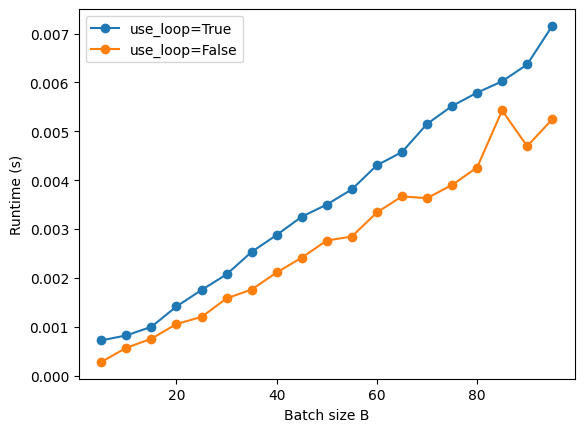

In [ ]:
import time
import matplotlib.pyplot as plt
from pytorch101 import batched_matrix_multiply

N, M, P = 100, 100, 100
loop_times = []
no_loop_times = []
Bs = list(range(5, 100, 5))
num_trials = 20
for B in Bs:
    loop_trials = []
    no_loop_trials = []
    for trial in range(num_trials):
        x = torch.randn(B, N, M)
        y = torch.randn(B, M, P)
        t0 = time.time()
        z1 = batched_matrix_multiply(x, y, use_loop=True)
        t1 = time.time()
        z2 = batched_matrix_multiply(x, y, use_loop=False)
        t2 = time.time()
        loop_trials.append(t1 - t0)
        no_loop_trials.append(t2 - t1)
    loop_mean = torch.tensor(loop_trials).mean().item()
    no_loop_mean = torch.tensor(no_loop_trials).mean().item()
    loop_times.append(loop_mean)
    no_loop_times.append(no_loop_mean)

plt.plot(Bs, loop_times, 'o-', label='use_loop=True')
plt.plot(Bs, no_loop_times, 'o-', label='use_loop=False')
plt.xlabel('Batch size B')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()

## Broadcasting

Broadcasting is a powerful mechanism that allows PyTorch to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller tensor and a larger tensor, and we want to use the smaller tensor multiple times to perform some operation on the larger tensor.

For example, suppose that we want to add a constant vector to each row of a tensor. We could do it like this:


In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = torch.zeros_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


This works; however when the tensor x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the tensor x is equivalent to forming a tensor vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:


In [ ]:
vv = v.repeat((4, 1))  # Stack 4 copies of v on top of each other
print(vv)              # Prints "[[1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]]"

tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])


In [ ]:
y = x + vv  # Add x and vv elementwise
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


PyTorch broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two tensors together follows these rules:

1.   If the tensors do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2.   The two tensors are said to be *compatible* in a dimension if they have the same size in the dimension, or if one of the tensors has size 1 in that dimension.
3.   The tensors can be broadcast together if they are compatible in all dimensions.
4.   After broadcasting, each tensor behaves as if it had shape equal to the elementwise maximum of shapes of the two input tensors.
5.   In any dimension where one tensor had size 1 and the other tensor had size greater than 1, the first tensor behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

Broadcasting usually happens implicitly inside many PyTorch operators. However we can also broadcast explicitly using the function [`torch.broadcast_tensors`](https://pytorch.org/docs/stable/generated/torch.broadcast_tensors.html#torch.broadcast_tensors):

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
print('Here is x (before broadcasting):')
print(x)
print('x.shape: ', x.shape)
print('\nHere is v (before broadcasting):')
print(v)
print('v.shape: ', v.shape)

xx, vv = torch.broadcast_tensors(x, v)
print('Here is xx (after) broadcasting):')
print(xx)
print('xx.shape: ', x.shape)
print('\nHere is vv (after broadcasting):')
print(vv)
print('vv.shape: ', vv.shape)

Here is x (before broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
x.shape:  torch.Size([4, 3])

Here is v (before broadcasting):
tensor([1, 0, 1])
v.shape:  torch.Size([3])
Here is xx (after) broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
xx.shape:  torch.Size([4, 3])

Here is vv (after broadcasting):
tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])
vv.shape:  torch.Size([4, 3])


Notice that after broadcasting, `x` remains the same but `v` has an extra dimension prepended to its shape, and it is duplicated to have the same shape as `x`; since they have the same shape after broadcasting they can be added elementwise.

Not all functions support broadcasting. You can find functions that does not support broadcasting from the official docs. (e.g. [`torch.mm`](https://pytorch.org/docs/stable/torch.html#torch.mm) does not support broadcasting, but [`torch.matmul`](https://pytorch.org/docs/1.1.0/torch.html#torch.matmul) does)

Broadcasting can let us easily implement many different operations. For example we can compute an outer product of vectors:

In [ ]:
# Compute outer product of vectors
v = torch.tensor([1, 2, 3])  # v has shape (3,)
w = torch.tensor([4, 5])     # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
print(v.view(3, 1) * w)

tensor([[ 4,  5],
        [ 8, 10],
        [12, 15]])


We can add a vector to each row of a matrix:

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
v = torch.tensor([1, 2, 3])               # v has shape (3,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(v)

# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
print('\nAdd the vector to each row of the matrix:')
print(x + v)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([1, 2, 3])

Add the vector to each row of the matrix:
tensor([[2, 4, 6],
        [5, 7, 9]])


We can add a vector to each column of a matrix:

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
w = torch.tensor([4, 5])                  # w has shape (2,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(w)

# x has shape (2, 3) and w has shape (2,). We reshape w to (2, 1);
# then when we add the two the result broadcasts to (2, 3):
print('\nAdd the vector to each column of the matrix:')
print(x + w.view(-1, 1))

# Another solution is the following:
# 1. Transpose x so it has shape (3, 2)
# 2. Since w has shape (2,), adding will broadcast to (3, 2)
# 3. Transpose the result, resulting in a shape (2, 3)
print((x.t() + w).t())

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([4, 5])

Add the vector to each column of the matrix:
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])


Multiply a tensor by a set of constants:

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

# We do the following:
# 1. Reshape c from (4,) to (4, 1, 1)
# 2. x has shape (2, 3). Since they have different ranks, when we multiply the
#    two, x behaves as if its shape were (1, 2, 3)
# 3. The result of the broadcast multiplication between tensor of shape
#    (4, 1, 1) and (1, 2, 3) has shape (4, 2, 3)
# 4. The result y has shape (4, 2, 3), and y[i] (shape (2, 3)) is equal to
#    c[i] * x
y = c.view(-1, 1, 1) * x
print('\nMultiply x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

Multiply x by a set of constants:
tensor([[[  1,   2,   3],
         [  4,   5,   6]],

        [[ 10,  20,  30],
         [ 40,  50,  60]],

        [[ 11,  22,  33],
         [ 44,  55,  66]],

        [[100, 200, 300],
         [400, 500, 600]]])


**Your turn**: In the file `pytorch101.py`, implement the function `normalize_columns` that normalizes the columns of a matrix. It should compute the mean and standard deviation of each column, then subtract the mean and divide by the standard deviation for each element in the column.

Example:
```
x = [[ 0,  30,  600],
     [ 1,  10,  200],
     [-1,  20,  400]]
```
- The first column has mean 0 and std 1
- The second column has mean 20 and std 10
- The third column has mean 400 and std 200

After normalizing the columns, the result should be:
```
y = [[ 0,  1,  1],
     [ 1, -1, -1],
     [-1,  0,  0]]
```

Recall that given scalars $x_1,\ldots,x_M$ the mean $\mu$ and standard deviation $\sigma$ are given by

$$\mu=\frac{1}{M}\sum_{i=1}^M x_i \hspace{4pc} \sigma = \sqrt{\frac{1}{M-1}\sum_{i=1}^M(x_i-\mu)^2}$$

In [ ]:
from pytorch101 import normalize_columns

x = torch.tensor([[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]])
y = normalize_columns(x)
print('Here is x:')
print(x)
print('Here is y:')
print(y)

x_expected = [[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]]
y_expected = [[0., 1., 1.], [1., -1., -1.], [-1., 0., 0.]]
y_correct = y.tolist() == y_expected
x_correct = x.tolist() == x_expected
print('y correct: ', y_correct)
print('x unchanged: ', x_correct)

Here is x:
tensor([[  0.,  30., 600.],
        [  1.,  10., 200.],
        [ -1.,  20., 400.]])
Here is y:
tensor([[ 0.,  1.,  1.],
        [ 1., -1., -1.],
        [-1.,  0.,  0.]])
y correct:  True
x unchanged:  True


### Out-of-place vs in-place operators
Most PyTorch operators are classified into one of two categories:
- **Out-of-place operators:** return a new tensor. Most PyTorch operators behave this way.
- **In-place operators:** modify and return the input tensor. Instance methods that end with an underscore (such as `add_()` are in-place. Operators in the `torch` namespace can be made in-place using the `out=` keyword argument.

For example:

In [ ]:
# Out-of-place addition creates and returns a new tensor without modifying the inputs:
x = torch.tensor([1, 2, 3])
y = torch.tensor([3, 4, 5])
print('Out-of-place addition:')
print('Before addition:')
print('x: ', x)
print('y: ', y)
z = x.add(y)  # Same as z = x + y or z = torch.add(x, y)
print('\nAfter addition (x and y unchanged):')
print('x: ', x)
print('y: ', y)
print('z: ', z)
print('z is x: ', z is x)
print('z is y: ', z is y)

# In-place addition modifies the input tensor:
print('\n\nIn-place Addition:')
print('Before addition:')
print('x: ', x)
print('y: ', y)
x.add_(y)  # Same as x += y or torch.add(x, y, out=x)
print('\nAfter addition (x is modified):')
print('x: ', x)
print('y: ', y)
print('z: ', z)
print('z is x: ', z is x)
print('z is y: ', z is y)

Out-of-place addition:
Before addition:
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])

After addition (x and y unchanged):
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])
z:  tensor([4, 6, 8])
z is x:  False
z is y:  False


In-place Addition:
Before addition:
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])

After addition (x is modified):
x:  tensor([4, 6, 8])
y:  tensor([3, 4, 5])
z:  tensor([4, 6, 8])
z is x:  False
z is y:  False


In general, **you should avoid in-place operations** since they can cause problems when computing gradients using autograd (which we will cover in a future assignment).

## Running on GPU

One of the most important features of PyTorch is that it can use graphics processing units (GPUs) to accelerate its tensor operations.

We can easily check whether PyTorch is configured to use GPUs:

Tensors can be moved onto any device using the .to method.

In [ ]:
import torch

if torch.cuda.is_available:
  print('PyTorch can use GPUs!')
else:
  print('PyTorch cannot use GPUs.')

PyTorch can use GPUs!


You can enable GPUs in Colab via Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU.

This may cause the Colab runtime to restart, so we will re-import torch in the next cell.

We have already seen that PyTorch tensors have a `dtype` attribute specifying their datatype. All PyTorch tensors also have a `device` attribute that specifies the device where the tensor is stored -- either CPU, or CUDA (for NVIDA GPUs). A tensor on a CUDA device will automatically use that device to accelerate all of its operations.

Just as with datatypes, we can use the [`.to()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.to) method to change the device of a tensor. We can also use the convenience methods `.cuda()` and `.cpu()` methods to move tensors between CPU and GPU.

In [ ]:
# Construct a tensor on the CPU
x0 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print('x0 device:', x0.device)

# Move it to the GPU using .to()
x1 = x0.to('cuda')
print('x1 device:', x1.device)

# Move it to the GPU using .cuda()
x2 = x0.cuda()
print('x2 device:', x2.device)

# Move it back to the CPU using .to()
x3 = x1.to('cpu')
print('x3 device:', x3.device)

# Move it back to the CPU using .cpu()
x4 = x2.cpu()
print('x4 device:', x4.device)

# We can construct tensors directly on the GPU as well
y = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float64, device='cuda')
print('y device / dtype:', y.device, y.dtype)

# Calling x.to(y) where y is a tensor will return a copy of x with the same
# device and dtype as y
x5 = x0.to(y)
print('x5 device / dtype:', x5.device, x5.dtype)

x0 device: cpu
x1 device: cuda:0
x2 device: cuda:0
x3 device: cpu
x4 device: cpu
y device / dtype: cuda:0 torch.float64
x5 device / dtype: cuda:0 torch.float64


Performing large tensor operations on a GPU can be **a lot faster** than running the equivalent operation on CPU.

Here we compare the speed of adding two tensors of shape (10000, 10000) on CPU and GPU:

(Note that GPU code may run asynchronously with CPU code, so when timing the speed of operations on the GPU it is important to use `torch.cuda.synchronize` to synchronize the CPU and GPU.)

In [ ]:
import time

a_cpu = torch.randn(10000, 10000, dtype=torch.float32)
b_cpu = torch.randn(10000, 10000, dtype=torch.float32)

a_gpu = a_cpu.cuda()
b_gpu = b_cpu.cuda()
torch.cuda.synchronize()

t0 = time.time()
c_cpu = a_cpu + b_cpu
t1 = time.time()
c_gpu = a_gpu + b_gpu
torch.cuda.synchronize()
t2 = time.time()

# Check that they computed the same thing
diff = (c_gpu.cpu() - c_cpu).abs().max().item()
print('Max difference between c_gpu and c_cpu:', diff)

cpu_time = 1000.0 * (t1 - t0)
gpu_time = 1000.0 * (t2 - t1)
print('CPU time: %.2f ms' % cpu_time)
print('GPU time: %.2f ms' % gpu_time)
print('GPU speedup: %.2f x' % (cpu_time / gpu_time))

Max difference between c_gpu and c_cpu: 0.0
CPU time: 648.48 ms
GPU time: 84.32 ms
GPU speedup: 7.69 x


You should see that running the same computation on the GPU was more than 10~30 times faster than on the CPU! Due to the massive speedups that GPUs offer, we will use GPUs to accelerate much of our machine learning code starting in Assignment 2.

**Your turn**: Use the GPU to accelerate the following matrix multiplication operation. You should see 5~10x speedup by using the GPU.

In [ ]:
import time
from pytorch101 import mm_on_cpu, mm_on_gpu

x = torch.rand(512, 4096)
w = torch.rand(4096, 4096)

t0 = time.time()
y0 = mm_on_cpu(x, w)
t1 = time.time()

y1 = mm_on_gpu(x, w)
torch.cuda.synchronize()
t2 = time.time()

print('y1 on CPU:', y1.device == torch.device('cpu'))
diff = (y0 - y1).abs().max().item()
print('Max difference between y0 and y1:', diff)
print('Difference within tolerance:', diff < 5e-2)

cpu_time = 1000.0 * (t1 - t0)
gpu_time = 1000.0 * (t2 - t1)
print('CPU time: %.2f ms' % cpu_time)
print('GPU time: %.2f ms' % gpu_time)
print('GPU speedup: %.2f x' % (cpu_time / gpu_time))

y1 on CPU: True
Max difference between y0 and y1: 0.001220703125
Difference within tolerance: True
CPU time: 230.94 ms
GPU time: 125.47 ms
GPU speedup: 1.84 x


Done! Now you can move to kNN.ipynb. Before you move, please check whether you generated any additional cell in every ipynb file (e.g. empty cell after very last code cell).